In [1]:
import requests
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
offset_ = 1
limit_ = 100
url_ = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object?offset={offset_}&limit={limit_}&sortField=devId.devShortCleanNm&sortType=asc&objStatus=0'
res = requests.get(url_)
obj = res.json()
obj_list = obj.get('data').get('list')
id_obj = [x.get('objId') for x in obj_list]

In [3]:
def df_objects(url_, obj_id):
    
    df = pd.DataFrame()
    
    for i in obj_id:
        url = url_ + '/' + str(i)
        res = requests.get(url)
        ob = res.json().get('data')
        dff = pd.json_normalize(ob)
        df = pd.concat([df, dff])

    return df

In [4]:
df = df_objects(f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/object', id_obj)


In [5]:
volum_reg = df.groupby('region')[['objElemLivingCnt']].sum()
volum_dat = df.groupby('objReady100PercDt')[['objElemLivingCnt']].sum().reset_index()

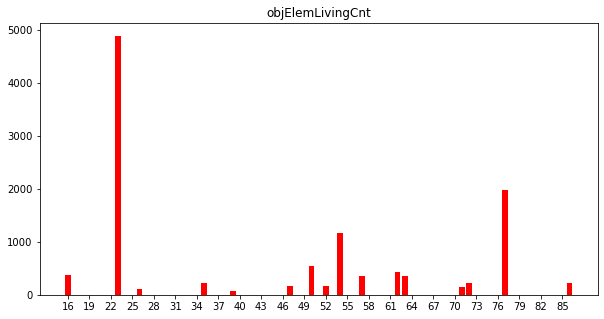

None


In [6]:
class graf(object):
    """класс строящий графики"""
    
    def __init__(self, data, color, size_w, size_h):
        """Constructor"""
        self.data = data
        self.color = color
        self.size_w = size_w
        self.size_h = size_h
#         self.h_pad = h_pad
    
    def line(self):
        fig, ax = plt.subplots(figsize = (self.size_w, self.size_h))
        ax.plot(self.data.objReady100PercDt, self.data.objElemLivingCnt, color=self.color)
        ax.set_title(self.data.columns[0])
        plt.subplots_adjust(wspace=1)
    
    def bar(self):
        fig, ax = plt.subplots(figsize = (self.size_w, self.size_h))
        x_range = list(range(int(self.data.index.min()), int(self.data.index.max()) + 1, 3))
        ax.bar(self.data.index, self.data.objElemLivingCnt, color=self.color)
        ax.set_title(volum_reg.columns[0])
        ax.set_xticks(x_range)
#         plt.subplots_adjust(wspace=1)
        plt.show()
 
 
if __name__ == "__main__":
    reg = graf(volum_reg, "red", 10, 5)
    print(reg.bar())

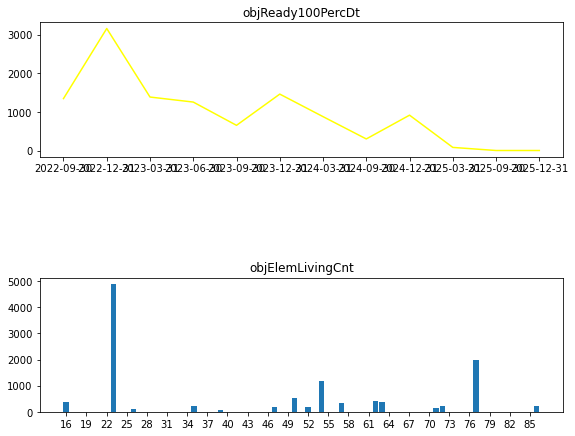

None


In [7]:
class duble(graf):
    def __init__(self, data, color, size_w, size_h, data2):
        super().__init__(data, color, size_w, size_h)
        self.data2 = data2
        
    def togather(self, rows, ncols, h_pad):
        self.rows = rows
        self.ncols = ncols
        self.h_pad = h_pad
        fig, ax = plt.subplots(figsize = (self.size_w, self.size_h),nrows=self.rows,ncols=self.ncols)
        fig.tight_layout(h_pad=self.h_pad)
        x_range = list(range(int(self.data2.index.min()), int(self.data2.index.max()) + 1, 3))
        ax1, ax2 = ax.flatten()
        ax1.plot(self.data.objReady100PercDt, self.data.objElemLivingCnt, color=self.color)
        ax2.bar(self.data2.index, self.data2.objElemLivingCnt)
        ax1.set_title(self.data.columns[0])
        ax2.set_title(self.data2.columns[0])
        ax2.set_xticks(x_range)
        plt.subplots_adjust(wspace=1)
        plt.show()
        
if __name__ == "__main__":
    tog = duble(data=volum_dat, color="yellow", size_w=8, size_h=6, data2=volum_reg)
    print(tog.togather(rows=2, ncols=1, h_pad=10))